In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round((T_max-T_min) / dT))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

T_crit = 2/np.log(1+np.sqrt(2)) # critical temperature

In [3]:
I_SL = np.load('./I_SL.npy')
T_SL = np.load('./T_SL.npy')
I_LBC = np.load('./I_LBC.npy')
T_LBC = np.load('./T_LBC.npy')
I_PBM = np.load('./I_PBM.npy')
T_PBM = np.load('./T_PBM.npy')

In [4]:
prob_energy_distributions = np.load('./prob_energy_distributions.npy')
energy_keys = np.load('./energy_keys.npy')
prob_magnetization_distributions = np.load('./prob_magnetization_distributions.npy')
magnetization_keys = np.load('./magnetization_keys.npy')

In [5]:
prob_energy_distributions.shape

(51, 15)

In [6]:
# compute the heat capacity and susceptibility
E_mean = np.sum(prob_energy_distributions * energy_keys[np.newaxis, :], axis=1)
E2_mean = np.sum(prob_energy_distributions * energy_keys[np.newaxis, :]**2, axis=1)
Cv = (E2_mean - E_mean**2) / T**2

M_mean = np.sum(prob_magnetization_distributions * np.abs(magnetization_keys[np.newaxis, :]), axis=1)
M2_mean = np.sum(prob_magnetization_distributions * magnetization_keys[np.newaxis, :]**2, axis=1)
chi = (M2_mean - M_mean**2) / T


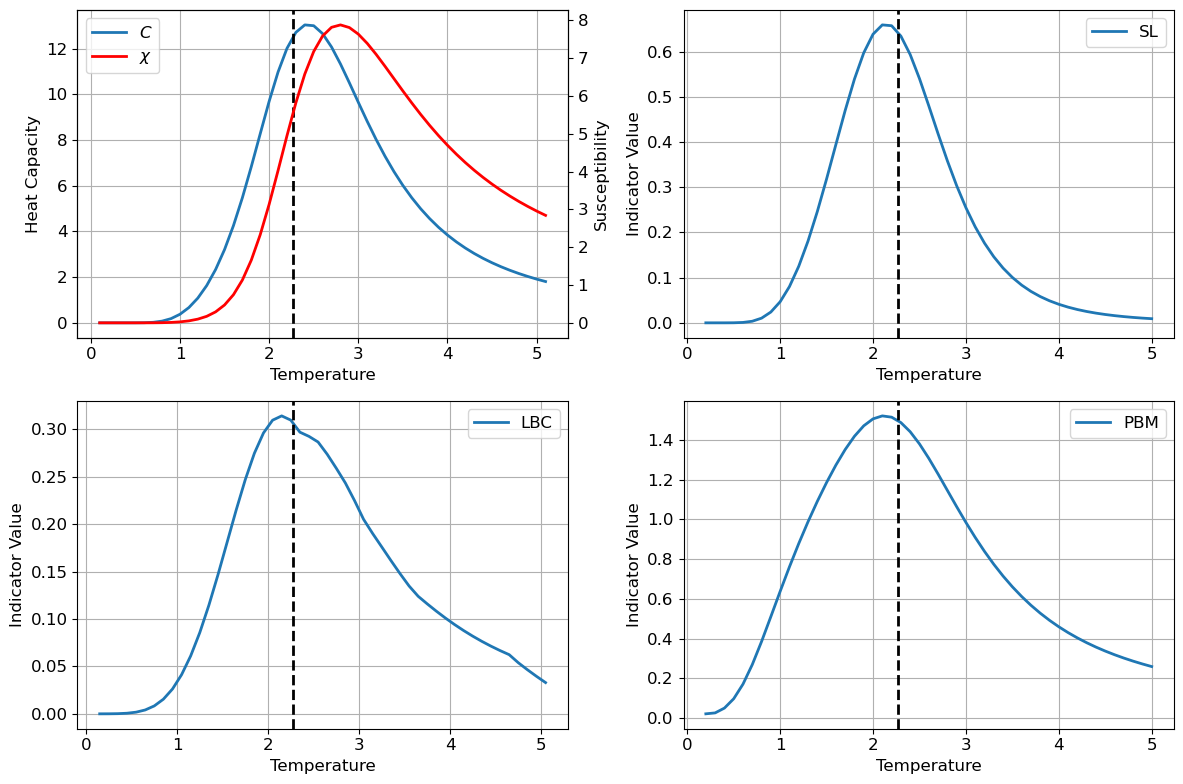

In [7]:
plt.rcParams['font.size'] = 12 
plt.rcParams['lines.linewidth'] = 2  

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
# for axs[0,0], use twinx to plot Cv and chi
line1, = axs[0, 0].plot(T, Cv, label=r'$C$')
axs[0, 0].axvline(x=T_crit, color='k', linestyle='--', label='critical temperature')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Heat Capacity')
axs[0, 0].grid()

ax2 = axs[0, 0].twinx()
line2, = ax2.plot(T, chi, 'r', label=r'$\chi$')
ax2.set_ylabel('Susceptibility')
# ax2.set_title('C and chi')
lines = [line1, line2]
labels = [line.get_label() for line in lines]
axs[0,0].legend(lines, labels, loc='upper left')

axs[0,1].plot(T_SL, I_SL, label='SL')
axs[0,1].axvline(x=T_crit, color='k', linestyle='--')
axs[0,1].set_xlabel('Temperature')
axs[0,1].set_ylabel('Indicator Value')
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(T_LBC, I_LBC, label='LBC')
axs[1,0].axvline(x=T_crit, color='k', linestyle='--')
axs[1,0].set_xlabel('Temperature')
axs[1,0].set_ylabel('Indicator Value')
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(T_PBM, I_PBM, label='PBM')
axs[1,1].axvline(x=T_crit, color='k', linestyle='--')
axs[1,1].set_xlabel('Temperature')
axs[1,1].set_ylabel('Indicator Value')
axs[1,1].grid()
axs[1,1].legend()

plt.tight_layout()
savefolder = f"../../analysis/boltzmann/"
os.makedirs(savefolder, exist_ok=True)
plt.savefig(f"{savefolder}/indicators.png")
plt.show()
